# Finding Similar Words with Word2Vec

## Importing Libraries

In [1]:
from gensim.models import Word2Vec
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
import re


Bad key "text.kerning_factor" on line 4 in
G:\DOWNLOADS\Programs\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
paragraph='''he drying process was equally modeled using the Artificial NeuralNetwork. As explained earlier, 70% of the experimental runs wereused for trainingof theneuralnetwork while the restwere used for test-ing and validation. This was to prevent over-training and over-parameterization (Jamil et al., 2018). The correlation coefficient andthe minimum value of mean squared error (MSE) were used as perfor-mance check to determine the optimum number of neurons in the hid-den layer. MSE is the mean squared difference of the output and input.Correlation coefficient values (R2) was used to validate the correlationbetween input variables and the output. These two were used to mea-sure the predictability of the artificial neural network (Agu et al.,2020). Through trial and error method, the number of neurons for opti-mal performance was obtained asfive in the trainlm algorithm.Gholamhossein et al. (2016)reported six neurons for efficient extrac-tion ofFerulago angulata.Based on enough neurons (5) in the hidden layer and the consis-tency of the input data, a two-layer feed-forward neural network withsigmoid hidden neurons and linear output neurons were employed inmulti-dimensional mapping of the process inputs inFig. 5.The regression plots with respect to the targets for the training, val-idation, testing and overall network process are presented inFig. 6.Amean square error (MSE) of 0.0000396 and correlation coefficient of0.99947 was obtained for the training. The correlation coefficient ob-tained was very close to that reported byGholamhossein et al. (2016).Correlation coefficients of 0.9343, 1.000 and 0.9698 were equally ob-tained for the validation, testing and overall neural network process re-spectively. Thefit is reasonably good for the data sets, with correlationcoefficient values in each case were very close to unity. The data fell rea-sonably along a 45-degree line, where the network outputs were equalto the targets. Based on these performance values, it was concluded thatthe network response was satisfactory and that the output adequatelytracked the target in the drying of potato.The plot of the best validation performance was presented inFig. 7.The performance of the network process for validation was analyzedto determine the reliability of the training process. The training networkshowed a validation performance with mean square error of 0.00656 atepoch 4. This did not indicate any over-fitting problem with the trainingnetwork since the error was very small.3.4. Modeling and prediction using ANFISThe ANFIS model was structured using a hybrid-learning algorithmthat encompasses the least square and the gradient method. Data1  1.5  2  2.5  3  3.5    80  100  120  140  160  1800  20  40  60  80  100  Moisture Content (%)A: Drying time (mins)B: Drying air speed (m/s)60  66  72  78  84  90    80  100  120  140  160  1800  20  40  60  80  100  Moisture Content (%)A: Drying time (mins)C: Temperature (oC)60  66  72  78  84  90    1  1.5  2  2.5  3  3.50  20  40  60  80  100  Moisture Content (%)B: Drying air speed (m/s)C: Temperature (oC)abcFig. 4.a–c: 3-D surface interactive plots of the input variables.Fig. 5.The ANN network architecture showedfive neurons in the hidden layer.44C.E. Onu et al. / Artificial Intelligence in Agriculture 4 (2020) 39–47
bserved in the ANN model. The three models were found to be reason-ably accurate in predicting the moisture content of the drying processthough the ANFIS with many residual of zero gave the best prediction.The predictive capacity of the models was evaluated with closenessof the correlation coefficient to unity. Furthermore, smaller values ofARE, RMSE, HYBRID and AARE values indicates better predictive capac-ity. The statistical error analysis was given inTable 6.The R2values of RSM and ANFIS were 0.998 showing better correla-tion than that of ANN which was 0.970. The ARE value of the ANFIS wassmaller than that of the RSM. The RMSE values were 0.0273, 0.0282 and0.1178 for RSM, ANFIS and ANN respectively. This result showed thatthe RSM and ANFIS gave better significant prediction than the ANN inthe drying of potato slices. RSM was reported to be better than ANN in op-timizing the design parameters for a V perforated baffle(Sunil, 2015)though in most other cases, ANN gave a better prediction than RSM.3.6. Model optimization and validationOptimum moisture content value of 31.995% was predicted at a dry-ing time of 180 min, drying air speed of 3.5 m/s and dryer temperatureof 60 °C. The test re-test experimental validation technique wasemployed in validating the predicted optimal value. The experimentwas carried out in triplicate and an average value of 32.65% was ob-tained. This showed close agreement with the predicted optimal value.'''

In [3]:
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [4]:
sentences = nltk.sent_tokenize(text)

In [5]:
sentences = [word_tokenize(sentence) for sentence in sentences]

In [6]:

for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]

In [7]:
model = Word2Vec(sentences,min_count = 1)

In [8]:

words = model.wv.vocab

In [9]:

words

{'drying': <gensim.models.keyedvectors.Vocab at 0x2ddcc171d88>,
 'process': <gensim.models.keyedvectors.Vocab at 0x2ddcc171088>,
 'equally': <gensim.models.keyedvectors.Vocab at 0x2ddcc171f08>,
 'modeled': <gensim.models.keyedvectors.Vocab at 0x2ddcc1712c8>,
 'using': <gensim.models.keyedvectors.Vocab at 0x2ddcc171348>,
 'artificial': <gensim.models.keyedvectors.Vocab at 0x2ddcc171488>,
 'neuralnetwork': <gensim.models.keyedvectors.Vocab at 0x2ddcc171ac8>,
 '.': <gensim.models.keyedvectors.Vocab at 0x2ddcc171c08>,
 'explained': <gensim.models.keyedvectors.Vocab at 0x2ddcc171408>,
 'earlier': <gensim.models.keyedvectors.Vocab at 0x2ddcc171748>,
 ',': <gensim.models.keyedvectors.Vocab at 0x2ddcc1718c8>,
 '%': <gensim.models.keyedvectors.Vocab at 0x2ddcc171c88>,
 'experimental': <gensim.models.keyedvectors.Vocab at 0x2ddcc171f48>,
 'runs': <gensim.models.keyedvectors.Vocab at 0x2ddcc171848>,
 'wereused': <gensim.models.keyedvectors.Vocab at 0x2ddcc171108>,
 'trainingof': <gensim.models.ke

In [10]:
similar = model.wv.most_similar('experimental')
similar

[('trial', 0.35166892409324646),
 ('hybrid-learning', 0.27799880504608154),
 ('hidden', 0.2508886754512787),
 ('close', 0.23683814704418182),
 ('many', 0.2058190405368805),
 ('inmulti-dimensional', 0.20311234891414642),
 ('extrac-tion', 0.18834879994392395),
 ('al.', 0.18405920267105103),
 ('statistical', 0.18289142847061157),
 ('intable', 0.1762010157108307)]

In [11]:
l1=['experimental','trainingof','restwere','runs','modeled','drying','validate','efficient','reported','efficient','good','sets','structured','anfis','significant','wassmaller','optimization','predicted','perforated']

In [12]:
for i in l1:
    similar = model.wv.most_similar(i)
    print('Similar word related to',i,' are : \n ', similar,'\n\n\n')

Similar word related to experimental  are : 
  [('trial', 0.35166892409324646), ('hybrid-learning', 0.27799880504608154), ('hidden', 0.2508886754512787), ('close', 0.23683814704418182), ('many', 0.2058190405368805), ('inmulti-dimensional', 0.20311234891414642), ('extrac-tion', 0.18834879994392395), ('al.', 0.18405920267105103), ('statistical', 0.18289142847061157), ('intable', 0.1762010157108307)] 



Similar word related to trainingof  are : 
  [('presented', 0.2084597647190094), ('showed', 0.20434290170669556), ('target', 0.20140409469604492), ('using', 0.19630655646324158), ('error', 0.19407516717910767), ('onu', 0.19322189688682556), ('outputs', 0.19159388542175293), ('neurons', 0.17303279042243958), ('gradient', 0.17168369889259338), ('value', 0.17123350501060486)] 



Similar word related to restwere  are : 
  [('algorithm.gholamhossein', 0.28586453199386597), ('employed', 0.2650638818740845), ('ofare', 0.2504507899284363), ('training', 0.22906625270843506), ('predicted', 0.22178

G:\DOWNLOADS\Programs\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


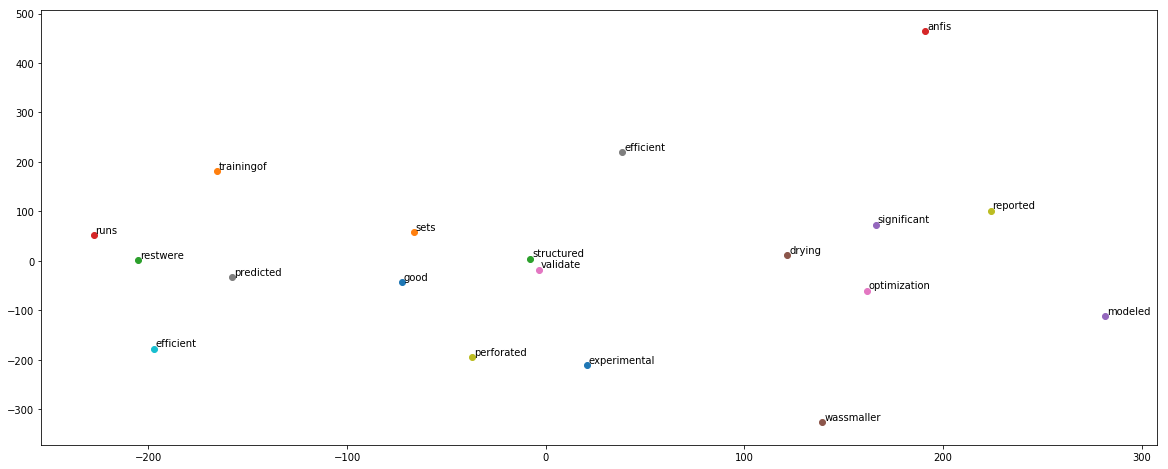

In [13]:

from sklearn.manifold import  TSNE
vocab = ['experimental','trainingof','restwere','runs','modeled','drying','validate','efficient','reported','efficient','good','sets','structured','anfis','significant','wassmaller','optimization','predicted','perforated']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)

## Obervations:

* From here we can observe that structured and validate  which are similar and plot each other.
